<a href="https://colab.research.google.com/github/qianjing2020/DS-Unit-1-Sprint-2-Statistics/blob/master/JingQian_LS_DS_122_Sampling_Confidence_Intervals_and_Hypothesis_Testing_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Assignment - Build a confidence interval

A confidence interval refers to a neighborhood around some point estimate, the size of which is determined by the desired p-value. For instance, we might say that 52% of Americans prefer tacos to burritos, with a 95% confidence interval of +/- 5%.

52% (0.52) is the point estimate, and +/- 5% (the interval $[0.47, 0.57]$) is the confidence interval. "95% confidence" means a p-value $\leq 1 - 0.95 = 0.05$.

In this case, the confidence interval includes $0.5$ - which is the natural null hypothesis (that half of Americans prefer tacos and half burritos, thus there is no clear favorite). So in this case, we could use the confidence interval to report that we've failed to reject the null hypothesis.

But providing the full analysis with a confidence interval, including a graphical representation of it, can be a helpful and powerful way to tell your story. Done well, it is also more intuitive to a layperson than simply saying "fail to reject the null hypothesis" - it shows that in fact the data does *not* give a single clear result (the point estimate) but a whole range of possibilities.

How is a confidence interval built, and how should it be interpreted? It does *not* mean that 95% of the data lies in that interval - instead, the frequentist interpretation is "if we were to repeat this experiment 100 times, we would expect the average result to lie in this interval ~95 times."

For a 95% confidence interval and a normal(-ish) distribution, you can simply remember that +/-2 standard deviations contains 95% of the probability mass, and so the 95% confidence interval based on a given sample is centered at the mean (point estimate) and has a range of +/- 2 (or technically 1.96) standard deviations.

Different distributions/assumptions (90% confidence, 99% confidence) will require different math, but the overall process and interpretation (with a frequentist approach) will be the same.

Your assignment - using the data from the prior module ([congressional voting records](https://archive.ics.uci.edu/ml/datasets/Congressional+Voting+Records)):


### Confidence Intervals:
1. Generate and numerically represent a confidence interval
2. Graphically (with a plot) represent the confidence interval
3. Interpret the confidence interval - what does it tell you about the data and its distribution?

### Chi-squared tests:
4. Take a dataset that we have used in the past in class that has **categorical** variables. Pick two of those categorical variables and run a chi-squared tests on that data
  - By hand using Numpy
  - In a single line using Scipy


In [1]:
# TODO - your code!
# Grab the file from UCI
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data

--2019-11-07 00:17:57--  https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18171 (18K) [application/x-httpd-php]
Saving to: ‘house-votes-84.data.2’

house-votes-84.data 100%[===================>]  17.75K  --.-KB/s    in 0.1s    

2019-11-07 00:17:58 (135 KB/s) - ‘house-votes-84.data.2’ saved [18171/18171]



In [0]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows',900)

In [3]:
# Load Data
col_names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa']
df = pd.read_csv('house-votes-84.data', 
                 header=None,
                 names=col_names)
print(df.shape)
df.head()

(435, 17)


,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,n,y,n,y,y,y,n,n,n,y,?,y,y,y,n,y
1,republican,n,y,n,y,y,y,n,n,n,n,n,y,y,y,n,?
2,democrat,?,y,y,?,y,y,n,n,n,n,y,n,y,y,n,n
3,democrat,n,y,y,n,?,y,n,n,n,n,y,n,y,n,n,y
4,democrat,y,y,y,n,y,y,n,n,n,n,y,?,y,y,y,y


In [4]:
df=df.replace({'?':np.NaN, 'y':1, 'n':0})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
# Generate and numerically represent a confidence interval
# split data into two samples, dem and rep
dem = df[df['party']=='democrat']
rep = df[df['party']=='republican']

In [6]:
# define CI function to calculate CI
def ConfidenceInterval_1D(x,alpha): # x need to be a 1-D array
  n = len(x) 
  dof = n-1
  mean = np.mean(x)
  stderr = np.std(x, ddof=1)/n**0.5
  CI = stats.t.interval(alpha, dof, loc=mean, scale=stderr)
  return (CI[0], mean, CI[1])

alpha=.05
ConfidenceInterval_1D(dem[col_names[4]],alpha)

(0.05318378015522494, 0.05405405405405406, 0.05492432795288318)

In [7]:
# democrat vote CI and mean
alpha = 0.05

dem_CI=[]
for item in col_names[1:]:
  CI_lower,mean,CI_upper=ConfidenceInterval_1D(dem[item], alpha)
  dem_CI.append([CI_lower,mean,CI_upper])
  # print('the confidence interval with mean is',CI_lower, mean, CI_upper)

dem_CI= pd.DataFrame(dem_CI, index=col_names[1:], columns=['CI_lower', 'mean', 'CI_upper'])
print('Democrat vote:')
dem_CI

Democrat vote:


,CI_lower,mean,CI_upper
handicapped-infants,0.602769,0.604651,0.606533
water-project,0.500167,0.502092,0.504017
budget,0.887250,0.888462,0.889673
physician-fee-freeze,0.053184,0.054054,0.054924
el-salvador-aid,0.214103,0.215686,0.217269
religious-groups,0.474822,0.476744,0.478666
anti-satellite-ban,0.770587,0.772201,0.773815
aid-to-contras,0.827448,0.828897,0.830347
mx-missile,0.756416,0.758065,0.759713
immigration,0.469562,0.471483,0.473404


In [8]:
# republican vote CI and mean
rep_CI=[]
print('Republican vote:')
for item in col_names[1:]:
  CI_lower,mean,CI_upper=ConfidenceInterval_1D(rep[item],alpha)  
  rep_CI.append([CI_lower,mean,CI_upper])
  
rep_CI= pd.DataFrame(rep_CI, index=col_names[1:], columns=['CI_lower', 'mean', 'CI_upper'])
print('Democrat vote:')
rep_CI

Republican vote:
Democrat vote:


,CI_lower,mean,CI_upper
handicapped-infants,0.185980,0.187879,0.189777
water-project,0.504326,0.506757,0.509187
budget,0.132490,0.134146,0.135803
physician-fee-freeze,0.987347,0.987879,0.988411
el-salvador-aid,0.950471,0.951515,0.952559
religious-groups,0.896117,0.897590,0.899064
anti-satellite-ban,0.238663,0.240741,0.242819
aid-to-contras,0.151117,0.152866,0.154615
mx-missile,0.113600,0.115152,0.116703
immigration,0.555162,0.557576,0.559990


/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


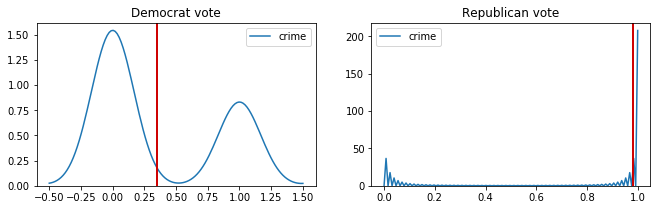

In [9]:
# Graphically (with a plot) represent the confidence interval
item='crime'
plt.figure(1, figsize=[11,3])
plt.subplot(1,2,1)
sns.kdeplot(dem[item]);
CI = dem_CI.loc[item]
plt.axvline(x=CI[0],color='red');
plt.axvline(x=CI[1],color='k');
plt.axvline(x=CI[2],color='red');
plt.title('Democrat vote');

plt.subplot(1,2,2)
sns.kdeplot(rep[item]);
CI = rep_CI.loc[item]
plt.axvline(x=CI[0],color='red');
plt.axvline(x=CI[1],color='k');
plt.axvline(x=CI[2],color='red');
plt.title('Republican vote');

In [10]:
dem[item].describe()

count    257.000000
mean       0.350195
std        0.477962
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: crime, dtype: float64

In [11]:
rep[item].describe()

count    161.000000
mean       0.981366
std        0.135649
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: crime, dtype: float64

In [0]:
# interpret the distribution and confidence interval
# For the above vote on crime, the democrat's vote is distributed as bimodal 
# with mode at 0 and 1, the 95% confidence interval band is very close 
# to the mean, meaning no to the bill; while the republican's vote has also 
# two mode, dominated by 1, in favor of the bill. 

## Stretch goals:

1. Write a summary of your findings, mixing prose and math/code/results. *Note* - yes, this is by definition a political topic. It is challenging but important to keep your writing voice *neutral* and stick to the facts of the data. Data science often involves considering controversial issues, so it's important to be sensitive about them (especially if you want to publish).
2. Apply the techniques you learned today to your project data or other data of your choice, and write/discuss your findings here.
3. Refactor your code so it is elegant, readable, and can be easily run for all issues.

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/adult.csv', na_values=" ?")
print(df.shape)
df.head()

(32561, 15)


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [14]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [15]:
df.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,sex,country,salary
count,30725,32561,32561,30718,32561,32561,32561,31978,32561
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,22696,10501,14976,4140,13193,27816,21790,29170,24720


In [16]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
country            583
salary               0
dtype: int64

In [19]:
# Now find if education make a difference in income
# Use two-way chi2 test to see if these two variables are independent
table = pd.crosstab(df['education'], df['hours-per-week'])
chi2, p, dof, expected= stats.chi2_contingency(table)
print(f'Chi-squared: {chi2}')
print(f'p-value: {p}')
print(f'Degree of freedom: {dof}')
print('Expected: \n', np.array(expected))
# low p-value means there are dependance of these two variables

Chi-squared: 4548.818094405753
p-value: 0.0
Degree of freedom: 1395
Expected: 
 [[5.73078222e-01 9.16925156e-01 1.11750253e+00 ... 5.73078222e-02
  3.15193022e-01 2.43558245e+00]
 [7.21722306e-01 1.15475569e+00 1.40735850e+00 ... 7.21722306e-02
  3.96947268e-01 3.06731980e+00]
 [2.65962348e-01 4.25539756e-01 5.18626578e-01 ... 2.65962348e-02
  1.46279291e-01 1.13033998e+00]
 ...
 [3.13258192e-02 5.01213108e-02 6.10853475e-02 ... 3.13258192e-03
  1.72292006e-02 1.33134732e-01]
 [3.53797488e-01 5.66075980e-01 6.89905101e-01 ... 3.53797488e-02
  1.94588618e-01 1.50363932e+00]
 [4.47836369e+00 7.16538190e+00 8.73280919e+00 ... 4.47836369e-01
  2.46310003e+00 1.90330457e+01]]


In [20]:
# prepare for visualization
# table = table.T
table = table.reset_index()
table.head(100)

hours-per-week,education,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,55,56,57,58,59,60,61,62,63,64,65,66,67,68,70,72,73,74,75,76,77,78,80,81,82,84,85,86,87,88,89,90,91,92,94,95,96,97,98,99
0,10th,3,1,1,3,2,5,0,7,0,19,2,17,0,2,24,5,1,4,0,49,1,1,2,11,24,1,2,4,1,51,1,8,1,2,45,9,3,12,2,...,7,5,0,1,0,24,0,0,0,0,6,0,0,1,12,0,0,0,1,0,0,0,5,0,0,1,0,0,0,0,0,2,0,0,0,0,0,0,0,5
1,11th,0,1,3,3,8,2,5,20,2,19,0,29,2,1,55,26,4,8,3,118,1,4,3,10,45,1,2,3,0,59,1,11,0,1,43,9,5,6,2,...,10,2,0,2,1,30,0,0,0,0,11,0,0,0,7,1,0,0,2,1,0,0,0,0,0,2,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,12th,0,0,0,0,0,3,1,2,0,7,0,6,0,1,9,6,2,6,0,38,2,0,1,6,16,0,1,1,0,23,0,4,1,0,20,2,0,4,1,...,6,1,0,0,0,6,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,1,1
3,1st-4th,0,0,0,1,1,0,0,0,0,1,0,2,0,0,2,1,0,1,0,11,1,1,0,3,4,0,0,1,0,6,0,2,0,2,12,1,1,2,0,...,2,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
4,5th-6th,0,0,1,0,0,1,0,1,0,4,0,2,0,0,6,1,0,0,1,11,1,1,0,2,7,0,0,0,0,10,0,4,1,1,14,4,2,2,0,...,4,3,0,0,1,4,0,0,0,0,1,0,1,0,1,1,0,0,3,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,7th-8th,0,3,2,3,2,0,1,3,0,18,0,1,0,1,6,3,0,0,2,23,1,0,1,6,16,1,0,0,0,33,1,9,2,0,32,5,0,10,0,...,7,3,0,0,0,19,0,0,1,1,2,1,0,0,4,1,0,0,6,0,0,0,3,0,0,2,1,0,0,0,0,0,1,0,0,0,0,0,0,7
6,9th,1,1,0,0,3,2,0,0,2,2,1,3,2,0,8,6,0,0,0,22,0,2,2,6,16,1,0,1,0,16,0,4,1,1,25,3,6,4,1,...,4,2,0,1,0,4,0,0,0,0,2,0,0,0,5,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
7,Assoc-acdm,1,4,3,3,4,3,1,4,1,4,0,2,3,0,10,5,0,2,0,38,1,1,0,5,27,1,2,1,0,35,1,14,2,0,35,16,5,13,0,...,24,7,1,1,1,46,0,1,0,0,6,1,1,1,4,0,0,0,3,0,0,1,6,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,4
8,Assoc-voc,3,1,2,0,3,1,0,5,0,4,0,3,0,1,11,2,0,1,0,28,0,1,1,9,14,2,0,0,0,39,0,13,1,0,41,26,6,31,2,...,27,10,1,0,0,66,0,1,1,3,9,0,0,0,6,0,0,0,4,1,0,0,3,0,0,4,0,0,0,0,0,2,0,0,0,0,0,0,1,4
9,Bachelors,0,3,5,6,11,9,9,22,2,29,0,13,3,3,46,17,2,7,0,135,7,2,1,20,56,3,6,7,0,130,0,34,4,1,196,22,22,64,6,...,193,12,2,5,0,321,0,3,2,2,43,3,0,1,60,13,1,0,8,0,2,0,22,0,0,2,1,0,0,0,0,5,0,0,0,0,0,1,0,10


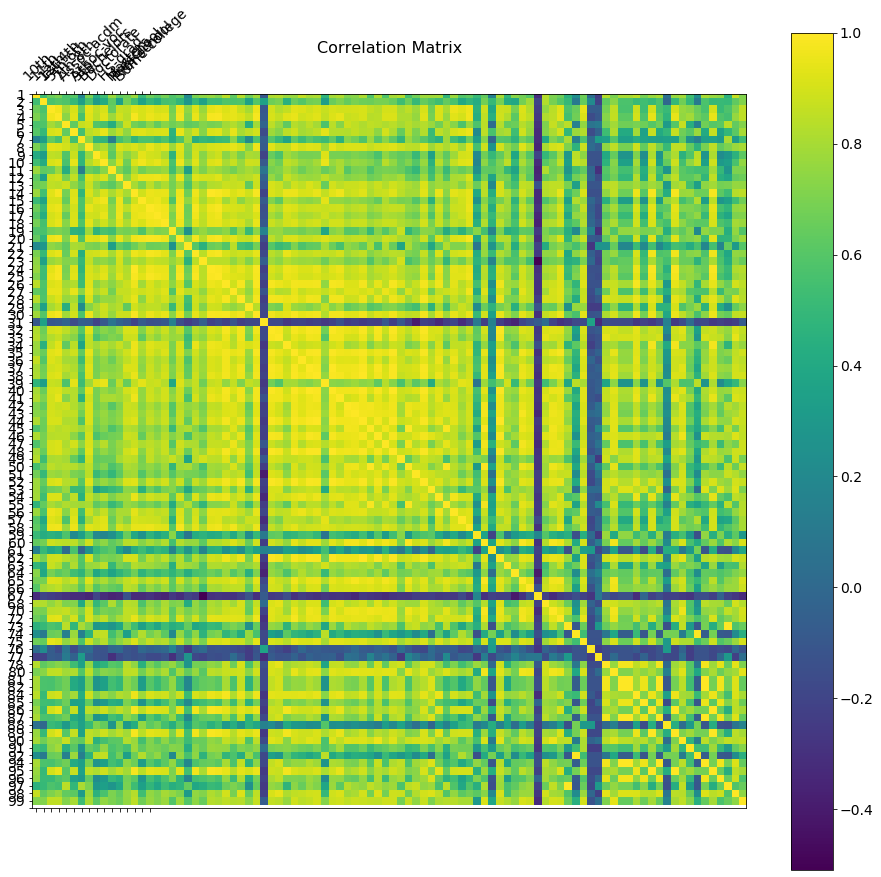

In [23]:
# Add visualization to explore the dependency of work hour and education
# sns.heatmap(table)
# sns.boxplot(x='hours-per-week', y='value',hue='education', data=table)
# plt.ylim(0,100)
f = plt.figure(figsize=(16, 15))
plt.matshow(table.corr(), fignum=f.number)
plt.xticks(range(table.shape[0]), table['education'], fontsize=14, rotation=45)
plt.yticks(range(table.shape[1]), list(table.columns[1:]), fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);


## Resources

- [Interactive visualize the Chi-Squared test](https://homepage.divms.uiowa.edu/~mbognar/applets/chisq.html)
- [Calculation of Chi-Squared test statistic](https://en.wikipedia.org/wiki/Pearson%27s_chi-squared_test)
- [Visualization of a confidence interval generated by R code](https://commons.wikimedia.org/wiki/File:Confidence-interval.svg)
- [Expected value of a squared standard normal](https://math.stackexchange.com/questions/264061/expected-value-calculation-for-squared-normal-distribution) (it's 1 - which is why the expected value of a Chi-Squared with $n$ degrees of freedom is $n$, as it's the sum of $n$ squared standard normals)